

## **Buisness Problem**: Retail Analysis (Cross-sell & Up-sell)



# **Dataset** 
(Online Retail.xlsx)

Here numpy is used becoz Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate the arrays.
Pandas library is used to do analysis of data. pandas help to analyse data.

In [2]:
import numpy as np
import pandas as pd

Here we have clone the Github repository to import Online Retail Dataset.

In [3]:
! git clone https://github.com/Swapnil-Damate/Upselling-and-cross-selling-.git



Cloning into 'Upselling-and-cross-selling-'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 43 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


Import dataset from Git

In [4]:

#url = 'https://raw.githubusercontent.com/Swapnil-Damate/Upselling-and-cross-selling-/master/Online%20Retail.xlsx'
dataset = pd.read_excel('/content/Upselling-and-cross-selling-/Online Retail.xlsx')


df = dataset.copy()


To know data features:

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Dataset has 8 features: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country.

## **Exploratory Data Analysis (EDA)**

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Rearrange the dataset features.

In [7]:
 df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

here new fetures is added to dataset to know totalamount of  products

In [8]:
       #Creating Total amount variable and adding it to dataset
TotalAmount=df['Quantity'].abs()*df['UnitPrice'].abs()
df.insert(loc=6,column='TotalAmount',value=TotalAmount)
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','TotalAmount','Description','InvoiceDate','Country']]
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


Total amount of purchases for each customer

In [9]:
                                                  #Total amount of purchases for each customer
new_df=df.groupby(['CustomerID']).sum()
new_df.sort_values('TotalAmount',ascending=False,inplace=True)
final_df = new_df[(new_df['Quantity']>0) & (new_df['TotalAmount'] > 0)]
final_df.head(10)

,Quantity,UnitPrice,TotalAmount
CustomerID,,,
16446.0,2,7.06,336942.10
14646.0,196719,5400.21,280923.02
18102.0,64122,5159.73,262876.11
17450.0,69029,3320.09,201619.41
14911.0,77180,31060.66,155077.50
12415.0,77242,2499.82,126103.61
14156.0,57025,6544.29,121375.12
16029.0,32148,24111.14,111057.07
17511.0,63012,2607.08,93999.38


In [10]:
dff = df.copy()
dff = dff.drop('CustomerID',axis=1)

Correlation between dataset features.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


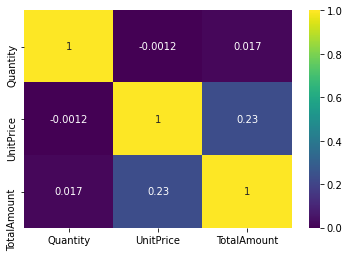

In [11]:
import seaborn as sns
sns.heatmap(dff.corr(),annot=True,cmap='viridis')

Customer who paid most and least

In [12]:
                                                             #Customer who paid most and least
print('Customer ID {} had paid maximum amount of {}'.format(int(final_df['TotalAmount'].argmax()),final_df['TotalAmount'].max()))
print('Customer ID {} had paid minimum amount of {}'.format(int(final_df['TotalAmount'].argmin()),final_df['TotalAmount'].min()))

Customer ID 0 had paid maximum amount of 336942.1
Customer ID 4317 had paid minimum amount of 3.75


Maximum and Minimum no. of quantity and it's corresponding customer ID 

In [13]:
                                                            #Maximum and Minimum no. of quantity and it's corresponding customer ID 
print('The maximum number of products has been bought is {} by customer id {}'.format(final_df['Quantity'].max(),final_df['Quantity'].argmax()))
print('The minimum number of product has been bought is {} by customer id {}'.format(final_df['Quantity'].min(),final_df['Quantity'].argmin()))

The maximum number of products has been bought is 196719 by customer id 1
The minimum number of product has been bought is 1 by customer id 907


Total sales at each country and how many quantities sold at each country

In [14]:
                                            #Total sales at each country and how many quantities sold at each country
country=df.groupby(['Country']).sum()
country.sort_values('TotalAmount',ascending=False,inplace=True)
country.drop('CustomerID',axis=1,inplace=True)
country.head()

,Quantity,UnitPrice,TotalAmount
Country,,,
United Kingdom,4263829,2.245715e+06,9.862638e+06
EIRE,142637,4.844719e+04,3.036311e+05
Netherlands,200128,6.492550e+03,2.862311e+05
Germany,117448,3.766600e+04,2.360361e+05
France,110480,4.303199e+04,2.220263e+05


# **Data Cleaning / Data Preprocessing**

In [15]:
df.shape

(541909, 9)

To find Count, mean, standard, minimum, maximum

In [16]:
df.describe()

,CustomerID,Quantity,UnitPrice,TotalAmount
count,406829.000000,541909.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114,21.379274
std,1713.600303,218.081158,96.759853,378.634556
min,12346.000000,-80995.000000,-11062.060000,0.000000
25%,13953.000000,1.000000,1.250000,3.750000
50%,15152.000000,3.000000,2.080000,9.900000
75%,16791.000000,10.000000,4.130000,17.700000
max,18287.000000,80995.000000,38970.000000,168469.600000


To remove extra spaces in Description if present

In [17]:

df['Description'] = df['Description'].str.strip()

To remove NaN entries, To convert invoiceNo & Stockcode data type to string

In [18]:
#Drop NaN Entries
df.dropna()
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df['StockCode'] = df['StockCode'].astype('str')
df.shape

(541909, 9)

We have to deal with only live transactions not with cancelled/ Returned transaction.

In [19]:
#Remove cancelled/Retured Transaction
df = df[~df['InvoiceNo'].str.contains('C')]

df = df[~df['InvoiceNo'].str.contains('A')]


# **Evaluate Algorithm**

Import libraries like fpgrowth, assocition rules and apriori to apply reccomendation algorithms on dataset.

In [20]:
!pip install mlxtend==0.17.0
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

     |████████████████████████████████| 1.3MB 4.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


After the cleaned up we have consolidate the items into one transaction(Order ID) per row with each product name.

In [21]:
basket_Germany = (df[df['Country'] == 'Germany']
             .groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket_Germany.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are lot of zeros in data but we have to make sure that all positive quantities are converted to one and others is set to zero.

In [22]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket_Germany.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

## Apriori Algorithm

Apply apriori and association rule on dataset and to generate frequent itemsets that have minimum support less than 0.02%. for association rule we have set minimum threshold to 0.7

In [23]:
frequent_items = apriori(basket_sets, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_items, metric='lift', min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.245077,0.041575,0.021882,0.089286,2.147556,0.011693,1.052388
1,(3 PIECE SPACEBOY COOKIE CUTTER SET),(ROUND SNACK BOXES SET OF4 WOODLAND),0.041575,0.245077,0.021882,0.526316,2.147556,0.011693,1.593727
2,(CHOCOLATE BOX RIBBONS),(6 RIBBONS RUSTIC CHARM),0.037199,0.102845,0.021882,0.588235,5.719650,0.018056,2.178806
3,(6 RIBBONS RUSTIC CHARM),(CHOCOLATE BOX RIBBONS),0.102845,0.037199,0.021882,0.212766,5.719650,0.018056,1.223017
4,(6 RIBBONS RUSTIC CHARM),(PLASTERS IN TIN CIRCUS PARADE),0.102845,0.115974,0.024070,0.234043,2.018065,0.012143,1.154145


Frequent Itemsets that have confidence more than 80%

In [24]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.80) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(BLUE POLKADOT BOWL),(RED RETROSPOT CUP),0.032823,0.070022,0.026258,0.800000,11.425000,0.023960,4.649891
65,(BLUE STRIPE CERAMIC DRAWER KNOB),(RED STRIPE CERAMIC DRAWER KNOB),0.028446,0.045952,0.024070,0.846154,18.413919,0.022763,6.201313
67,(BLUE STRIPE CERAMIC DRAWER KNOB),(WHITE SPOT RED CERAMIC DRAWER KNOB),0.028446,0.052516,0.024070,0.846154,16.112179,0.022576,6.158643
69,(PINK VINTAGE SPOT BEAKER),(BLUE VINTAGE SPOT BEAKER),0.024070,0.030635,0.024070,1.000000,32.642857,0.023333,inf
89,(CHARLOTTE BAG SUKI DESIGN),(WOODLAND CHARLOTTE BAG),0.045952,0.126915,0.037199,0.809524,6.378489,0.031367,4.583698
100,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.048140,0.050328,0.039387,0.818182,16.256917,0.036965,5.223195
111,(COFFEE MUG PEARS DESIGN),(COFFEE MUG APPLES DESIGN),0.039387,0.061269,0.035011,0.888889,14.507937,0.032598,8.448578
125,(DINOSAUR PARTY BAG + STICKER SET),(WOODLAND PARTY BAG + STICKER SET),0.021882,0.067834,0.021882,1.000000,14.741935,0.020398,inf
126,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.024070,0.026258,0.024070,1.000000,38.083333,0.023438,inf
127,(DOLLY GIRL CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.026258,0.024070,0.024070,0.916667,38.083333,0.023438,11.711160


# FpGrowth Algorithm

In [25]:
frequent_items2 = fpgrowth(basket_sets,
                          min_support = 0.02, use_colnames = True)
rules2 = association_rules(frequent_items2, metric="lift", min_threshold=1)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG WOODLAND ANIMALS),(WOODLAND CHARLOTTE BAG),0.100656,0.126915,0.048140,0.478261,3.768366,0.035365,1.673414
1,(WOODLAND CHARLOTTE BAG),(JUMBO BAG WOODLAND ANIMALS),0.126915,0.100656,0.048140,0.379310,3.768366,0.035365,1.448942
2,(JUMBO BAG WOODLAND ANIMALS),(PLASTERS IN TIN WOODLAND ANIMALS),0.100656,0.137856,0.028446,0.282609,2.050035,0.014570,1.201777
3,(PLASTERS IN TIN WOODLAND ANIMALS),(JUMBO BAG WOODLAND ANIMALS),0.137856,0.100656,0.028446,0.206349,2.050035,0.014570,1.133173
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(JUMBO BAG WOODLAND ANIMALS),0.245077,0.100656,0.037199,0.151786,1.507958,0.012531,1.060279


In [26]:
Rules = rules2[ (rules2['lift'] >= 6) &
       (rules2['confidence'] >= 0.80) ]
Rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.035011,0.063457,0.032823,0.93750,14.773707,0.030601,14.984683
45,"(JUMBO BAG RED RETROSPOT, WOODLAND CHARLOTTE BAG)",(JUMBO BAG WOODLAND ANIMALS),0.024070,0.100656,0.024070,1.00000,9.934783,0.021647,inf
158,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.84375,6.648168,0.050194,5.587746
170,"(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE...",(WOODLAND CHARLOTTE BAG),0.030635,0.126915,0.030635,1.00000,7.879310,0.026747,inf
177,"(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH BOX)",(WOODLAND CHARLOTTE BAG),0.021882,0.126915,0.021882,1.00000,7.879310,0.019105,inf


# Result Visualization

In [27]:
#result.to_excel('/content/drive/My Drive/Internship Model Result/Final_retail_result.xlsx')
final_Table = pd.read_excel('https://raw.githubusercontent.com/Swapnil-Damate/Upselling-and-cross-selling-/master/Final_onlineretail_result.xlsx')
#final_Table = pd.read_excel('/content/Upselling-and-cross-selling-/Final_onlineretail_result.xlsx')
final_Table = final_Table.drop('Unnamed: 0', axis=1)
final_Table = final_Table.drop('Unnamed: 0.1', axis=1)
final_Table = final_Table.replace()
final_Table

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,JAM JAR WITH GREEN LID,JAM JAR WITH PINK LID,0.035011,0.063457,0.032823,0.937500,14.773707,0.030601,14.984683
1,"JUMBO BAG RED RETROSPOT, WOODLAND CHARLOTTE BAG",JUMBO BAG WOODLAND ANIMALS,0.024070,0.100656,0.024070,1.000000,9.934783,0.021647,inf
2,RED RETROSPOT CHARLOTTE BAG,WOODLAND CHARLOTTE BAG,0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
3,"ROUND SNACK BOXES SET OF4 WOODLAND, RED RETROS...",WOODLAND CHARLOTTE BAG,0.030635,0.126915,0.030635,1.000000,7.879310,0.026747,inf
4,"RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH BOX",WOODLAND CHARLOTTE BAG,0.021882,0.126915,0.021882,1.000000,7.879310,0.019105,inf
5,"RED RETROSPOT CHARLOTTE BAG, RED TOADSTOOL LED...",WOODLAND CHARLOTTE BAG,0.024070,0.126915,0.024070,1.000000,7.879310,0.021015,inf
6,"JUMBO BAG WOODLAND ANIMALS, RED RETROSPOT CHAR...",WOODLAND CHARLOTTE BAG,0.024070,0.126915,0.021882,0.909091,7.163009,0.018827,9.603939
7,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,0.035011,0.078775,0.032823,0.937500,11.901042,0.030065,14.739606
8,"JUMBO BAG WOODLAND ANIMALS, JUMBO BAG PINK POL...",JUMBO BAG RED RETROSPOT,0.026258,0.078775,0.026258,1.000000,12.694444,0.024190,inf
9,"JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT",JUMBO BAG WOODLAND ANIMALS,0.032823,0.100656,0.026258,0.800000,7.947826,0.022954,4.496718


##**MODEL**

# CROSS-SELL

1.

In [28]:
def recme(antecedents):
  consequent = final_Table.loc[final_Table['antecedents'] == antecedents, 'consequents'].tolist()
  return consequent[0]

In [29]:
recme('SPACEBOY CHILDRENS CUP')

'SPACEBOY CHILDRENS BOWL'

2.

In [30]:
data_ib = (df[df['Country'] == 'Germany']
             .groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID'))
data_ib.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12468.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,0.0,0.0,25.0,25.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,25.0,25.0,25.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
data_ib=data_ib.reset_index()
data_ib.head()

Description,CustomerID,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,12426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12468.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,0.0,0.0,25.0,25.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,25.0,25.0,25.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data_ib=data_ib.drop('CustomerID', 1)
data_ib.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,0.0,0.0,25.0,25.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,25.0,25.0,25.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Description v/s Description
data_ibs = pd.DataFrame(index=data_ib.columns,
                        columns=data_ib.columns)
data_ibs.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 COLOURED PARTY BALLOONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 IVORY ROSE PEG PLACE SETTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 MESSAGE CARDS WITH ENVELOPES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 PENCIL SMALL TUBE WOODLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data_ibs = data_ibs.fillna(0)

In [ ]:
from scipy.spatial.distance import cosine
for i in range(0,len(data_ibs.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.iloc[i,j] = 1-cosine(data_ib.iloc[:,i],data_ib.iloc[:,j])
#Take too time for execution

In [36]:
data_ibs.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,...,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CAROUSEL,WRAP CHRISTMAS SCREEN PRINT,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FLOWER SHOP,WRAP FOLK ART,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED DOILEY,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,1.000000,0.342997,0.0,0.000000,0.469831,0.230631,0.213979,0.0,0.0,0.0,0.292509,0.242536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064249,0.00000,0.351702,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.146254,0.0,0.026003,0.000000,0.46676,0.342997,0.183340,0.0,0.0,0.214819,...,0.140028,0.0,0.0,0.0,0.485071,0.460179,0.485071,0.257248,0.216930,0.0,0.0,0.0,0.0,0.458349,0.342997,0.0,0.000000,0.0,0.0,0.646762,0.428086,0.000000,0.0,0.060634,0.420084,0.485071,0.560112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.342997,0.0,0.0,0.000000,0.000000,0.0
12 COLOURED PARTY BALLOONS,0.342997,1.000000,0.0,0.000000,0.000000,0.336199,0.000000,0.0,0.0,0.0,0.426401,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.500000,0.267261,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.707107,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.235702,0.277350,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000000,0.0
12 IVORY ROSE PEG PLACE SETTINGS,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.107211,0.577350,0.19245,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.316228,0.000000,0.000000,0.447214,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.707107,0.0,0.0,0.000000,0.196116,0.000000,0.0,0.000000,0.000000,0.000000,0.577350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
12 MESSAGE CARDS WITH ENVELOPES,0.000000,0.000000,0.0,1.000000,0.028075,0.106315,0.131519,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.043234,

In [37]:
data_neighbours = pd.DataFrame(index=data_ibs.columns,columns=range(1,5))
 
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(data_ibs.columns)):
    data_neighbours.iloc[i,:4] = data_ibs.iloc[0:,i].sort_values(ascending=False)[:4].index
data_neighbours = data_neighbours.reset_index()

In [38]:
data_neighbours.head(50)

,Description,1,2,3,4
0,10 COLOUR SPACEBOY PEN,10 COLOUR SPACEBOY PEN,BLOSSOM IMAGES GIFT WRAP SET,ADVENT CALENDAR GINGHAM SACK,50'S CHRISTMAS GIFT BAG LARGE
1,12 COLOURED PARTY BALLOONS,12 COLOURED PARTY BALLOONS,BEADED CRYSTAL HEART GREEN LARGE,AIRLINE BAG VINTAGE JET SET WHITE,"ACRYLIC HANGING JEWEL,PINK"
2,12 IVORY ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,12 IVORY ROSE PEG PLACE SETTINGS,ASSTD DESIGN 3D PAPER STICKERS,BLUE VOILE LAMPSHADE
3,12 MESSAGE CARDS WITH ENVELOPES,12 MESSAGE CARDS WITH ENVELOPES,ANIMAL STICKERS,36 FOIL HEART CAKE CASES,12 PENCILS SMALL TUBE SKULL
4,12 PENCIL SMALL TUBE WOODLAND,12 PENCIL SMALL TUBE WOODLAND,ASSORTED TUTTI FRUTTI BRACELET,BALLOON ART MAKE YOUR OWN FLOWERS,6 RIBBONS SHIMMERING PINKS
5,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED RETROSPOT,BEADED CRYSTAL HEART GREEN LARGE,"ACRYLIC HANGING JEWEL,PINK",AIRLINE BAG VINTAGE JET SET WHITE
6,12 PENCILS SMALL TUBE SKULL,12 PENCILS SMALL TUBE SKULL,BIRD DECORATION RED RETROSPOT,ABC TREASURE BOOK BOX,3 PIECE SPACEBOY COOKIE CUTTER SET
7,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE POSY,ASSORTED COLOUR T-LIGHT HOLDER,BIRTHDAY PARTY CORDON BARRIER TAPE,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS
8,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,ASSORTED COLOUR T-LIGHT HOLDER
9,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE RED RETROSPOT,BALLOON PUMP WITH 10 BALLOONS,"BIRTHDAY CARD, RETRO SPOT"


In [39]:
data_neighbours.columns = [
  'Description',
  'rec_1',
  'rec_2',
  'rec_3',
  'rec_4',

]
data_neighbours.shape

(1695, 5)

In [40]:
data_neighbours.tail(20)

,Description,rec_1,rec_2,rec_3,rec_4
1675,WRAP RED APPLES,50'S CHRISTMAS GIFT BAG LARGE,10 COLOUR SPACEBOY PEN,AIRLINE BAG VINTAGE JET SET BROWN,ANGEL DECORATION PAINTED ZINC
1676,WRAP RED DOILEY,3 STRIPEY MICE FELTCRAFT,3 TIER SWEETHEART GARDEN SHELF,2 PICTURE BOOK EGGS EASTER BUNNY,BAG 250g SWIRLY MARBLES
1677,WRAP RED VINTAGE DOILY,BLUE GIANT GARDEN THERMOMETER,BLUE POLKADOT COFFEE MUG,BABUSHKA LIGHTS STRING OF 10,ASSORTED BOTTLE TOP MAGNETS
1678,WRAP SUKI AND FRIENDS,BLUE HARMONICA IN BOX,3 TIER SWEETHEART GARDEN SHELF,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER BUNNY
1679,WRAP VINTAGE LEAF DESIGN,ALARM CLOCK BAKELIKE CHOCOLATE,ASSORTED TUTTI FRUTTI BRACELET,BALLOON ART MAKE YOUR OWN FLOWERS,6 RIBBONS SHIMMERING PINKS
1680,WRAP VINTAGE PETALS DESIGN,5 HOOK HANGER MAGIC TOADSTOOL,ALARM CLOCK BAKELIKE IVORY,BLUE HARMONICA IN BOX,BLOSSOM IMAGES GIFT WRAP SET
1681,WRAP WEDDING DAY,ASSORTED EASTER GIFT TAGS,12 IVORY ROSE PEG PLACE SETTINGS,BLUE VOILE LAMPSHADE,BANQUET BIRTHDAY CARD
1682,"WRAP, BILLBOARD FONTS DESIGN",BLUE VOILE LAMPSHADE,12 RED ROSE PEG PLACE SETTINGS,ASSTD DESIGN 3D PAPER STICKERS,12 IVORY ROSE PEG PLACE SETTINGS
1683,YELLOW COAT RACK PARIS FASHION,BLACK CHRISTMAS TREE 60CM,BATHROOM METAL SIGN,BLACK CHRISTMAS TREE 120CM,3 DRAWER ANTIQUE WHITE WOOD CABINET
1684,YOU'RE CONFUSING ME METAL SIGN,BLUE PAPER PARASOL,BLUE PARTY BAGS,36 FOIL HEART CAKE CASES,72 SWEETHEART FAIRY CAKE CASES


In [41]:
def rec_cross(Description):
  consequent = final_Table.loc[final_Table['antecedents'] == Description, 'consequents'].tolist()

  if (len(consequent) > 0):
    print(' First Reccomendation for Cross-sell: ', consequent)
    rec_2 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_2'].tolist()
    print(' Reccomendation for Cross-sell: ', rec_2)
    rec_3 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_3'].tolist()
    print(' Reccomendation for Cross-sell: ', rec_3)
    rec_4 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_4'].tolist()
    print(' Reccomendation for Cross-sell: ', rec_4)

  else:
    rec_2 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_2'].tolist()
    print(' Reccomendation for Cross-sell: ', rec_2)
    rec_3 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_3'].tolist()
    print(' Reccomendation for Cross-sell: ', rec_3)
    rec_4 = data_neighbours.loc[data_neighbours['Description'] == Description, 'rec_4'].tolist()
    print(' Reccomendation for Cross-sell: ', rec_4)
  


In [42]:
rec_cross('10 COLOUR SPACEBOY PEN')

 Reccomendation for Cross-sell:  ['BLOSSOM IMAGES GIFT WRAP SET']
 Reccomendation for Cross-sell:  ['ADVENT CALENDAR GINGHAM SACK']
 Reccomendation for Cross-sell:  ["50'S CHRISTMAS GIFT BAG LARGE"]


In [43]:
rec_cross('12 COLOURED PARTY BALLOONS')

 Reccomendation for Cross-sell:  ['BEADED CRYSTAL HEART GREEN LARGE']
 Reccomendation for Cross-sell:  ['AIRLINE BAG VINTAGE JET SET WHITE']
 Reccomendation for Cross-sell:  ['ACRYLIC HANGING JEWEL,PINK']


In [44]:
rec_cross('5 HOOK HANGER MAGIC TOADSTOOL')

 Reccomendation for Cross-sell:  ['BAG 250g SWIRLY MARBLES']
 Reccomendation for Cross-sell:  ['BANQUET BIRTHDAY  CARD']
 Reccomendation for Cross-sell:  ['BABY BOOM RIBBONS']


In [45]:
rec_cross('SPACEBOY CHILDRENS CUP')

 First Reccomendation for Cross-sell:  ['SPACEBOY CHILDRENS BOWL']
 Reccomendation for Cross-sell:  ['2 PICTURE BOOK EGGS EASTER BUNNY']
 Reccomendation for Cross-sell:  ['3 TIER SWEETHEART GARDEN SHELF']
 Reccomendation for Cross-sell:  ['BIRD DECORATION RED RETROSPOT']


In [46]:
rec_cross('ZINC BOX SIGN HOME')

 Reccomendation for Cross-sell:  ['ZINC WILLIE WINKIE  CANDLE STICK']
 Reccomendation for Cross-sell:  ['FRYING PAN PINK POLKADOT']
 Reccomendation for Cross-sell:  ['FRENCH ENAMEL UTENSIL HOLDER']


In [47]:
rec_cross('6 RIBBONS EMPIRE')

 Reccomendation for Cross-sell:  ['BISCUIT TIN VINTAGE CHRISTMAS']
 Reccomendation for Cross-sell:  ['BATH BUILDING BLOCK WORD']
 Reccomendation for Cross-sell:  ['200 BENDY SKULL STRAWS']


# UPSELL

In [48]:
#install necessary packages for Natural Language Processing
!pip install gensim
!pip install nltk

In [49]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
df=dataset.copy()

In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [52]:
df.shape

(541909, 8)

In [53]:
# Dataset Preprocessing
df['clean_products'] = df['Description'].str.replace("[^a-zA-Z#]", " ")
df['clean_products'] = df['clean_products'].fillna('').apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df['clean_products'] = df['clean_products'].fillna('').apply(lambda x: x.lower())
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clean_products
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,children apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade


In [54]:
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = df['clean_products'].fillna('').apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df['clean_products'] = detokenized_doc
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clean_products
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,children apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade


In [55]:
#Check if any null value
df.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
clean_products         0
dtype: int64

In [56]:
#Convert float to string
df['StockCode']= df['StockCode'].astype(str)

In [57]:
#Find total no. of customers
customers = df["CustomerID"].unique().tolist()
len(customers)

4373

In [58]:
select=df[['StockCode','CustomerID','clean_products','UnitPrice','Description']]
df=select.copy()
df

,StockCode,CustomerID,clean_products,UnitPrice,Description
0,85123A,17850.0,white hanging heart light holder,2.55,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,17850.0,white metal lantern,3.39,WHITE METAL LANTERN
2,84406B,17850.0,cream cupid hearts coat hanger,2.75,CREAM CUPID HEARTS COAT HANGER
3,84029G,17850.0,knitted union flag hot water bottle,3.39,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,17850.0,red woolly hottie white heart,3.39,RED WOOLLY HOTTIE WHITE HEART.
...,...,...,...,...,...
541904,22613,12680.0,pack spaceboy napkins,0.85,PACK OF 20 SPACEBOY NAPKINS
541905,22899,12680.0,children apron dolly girl,2.10,CHILDREN'S APRON DOLLY GIRL
541906,23254,12680.0,childrens cutlery dolly girl,4.15,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,12680.0,childrens cutlery circus parade,4.15,CHILDRENS CUTLERY CIRCUS PARADE


In [59]:
purchases= []

 #populate the list with the product codes
for i in tqdm(customers):
    temp = df[df["CustomerID"] == i]["StockCode"].tolist()
    purchases.append(temp)

100%|██████████| 4373/4373 [00:06<00:00, 727.69it/s]


In [60]:
print(purchases[0:2])


[['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730', '22633', '22632', '22632', '22633', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '21730', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '21730', '22632', '22633', '85123A', '71053', '84406B', '15056BL', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '85123A', '71053', '82483', '82486', '82482', '82494L', '22411', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '37370', '21871', '21071', '21068', '82483', '22411', '84029G', '84029E', '21730', '22

In [61]:
#Build the vocabulary & train the model
model = Word2Vec(window = 10, sg = 1,negative = 10) # for negative sampling

model.build_vocab(purchases, progress_per=200)

model.train(purchases, total_examples = model.corpus_count, epochs=10)

(4028705, 4068290)

In [62]:
model.init_sims(replace=True)
print(model)

Word2Vec(vocab=3208, size=100, alpha=0.025)


In [63]:
# extract all vectors
X = model[model.wv.vocab]
X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(3208, 100)

In [64]:
products = df[["StockCode", "Description","UnitPrice"]].copy()
products

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,0.85
541905,22899,CHILDREN'S APRON DOLLY GIRL,2.10
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4.15
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.15


In [65]:
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")
products_dict = products.groupby('StockCode')["Description"].apply(list).to_dict()
products_dict

{'10002': [nan],
 '10080': ['GROOVY CACTUS INFLATABLE'],
 '10120': ['DOGGY RUBBER'],
 '10123C': [nan],
 '10123G': [nan],
 '10124A': ['SPOTS ON RED BOOKCOVER TAPE'],
 '10124G': ['ARMY CAMO BOOKCOVER TAPE'],
 '10125': ['MINI FUNKY DESIGN TAPES'],
 '10133': ['damaged'],
 '10134': [nan],
 '10135': ['COLOURING PENCILS BROWN TUBE'],
 '11001': ['ASSTD DESIGN RACING CAR PEN'],
 '15030': ['FAN BLACK FRAME '],
 '15034': ['PAPER POCKET TRAVELING FAN '],
 '15036': ['ASSORTED COLOURS SILK FAN'],
 '15039': ['SANDALWOOD FAN'],
 '15044A': ['PINK PAPER PARASOL '],
 '15044B': ['BLUE PAPER PARASOL '],
 '15044C': ['PURPLE PAPER PARASOL'],
 '15044D': ['RED PAPER PARASOL'],
 '15056BL': ['EDWARDIAN PARASOL BLACK'],
 '15056N': ['EDWARDIAN PARASOL NATURAL'],
 '15056P': ['EDWARDIAN PARASOL PINK'],
 '15056bl': ['EDWARDIAN PARASOL BLACK'],
 '15056n': ['EDWARDIAN PARASOL NATURAL'],
 '15056p': ['EDWARDIAN PARASOL PINK'],
 '15058A': ['BLUE POLKADOT GARDEN PARASOL'],
 '15058B': ['PINK POLKADOT GARDEN PARASOL'],
 '150

In [66]:
#Function to return similar products
def similar_products(no, n = 5):
    prod_name=products_dict[no]
    prod_value=products.loc[products['StockCode'] == no,'UnitPrice'].tolist()
    list_of_tuples = [(no,prod_name[0],prod_value[0])]
     


    v=model[no]
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        k=products.loc[products['StockCode'] == j[0],'UnitPrice'].tolist()
        pair = (j[0], products_dict[ j[0]][0], k[0], j[1])
        new_ms.append(pair)
        frame=pd.DataFrame(list_of_tuples,columns=['StockCode','Description','Price']).set_index('StockCode')
        frame1=pd.DataFrame(new_ms,columns=['StockCode','Product','Price','Weightage']).sort_values(by=['Price'],ascending=False).\
                    set_index('StockCode')
        frame2=frame1
        
    
    return frame,frame2

In [67]:
 def recc_upsell(var):
     import warnings
     a,b=similar_products(var)
     print("Product you choosed:")
     warnings.filterwarnings("ignore")
     display (a)
     print("Recommended for upsell:")
     display(b)
   


   

In [68]:
recc_upsell('85123A')

Product you choosed:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,Description,Price
StockCode,,
85123A,CREAM HANGING HEART T-LIGHT HOLDER,2.95


Recommended for upsell:


,Product,Price,Weightage
StockCode,,,
22828,REGENCY MIRROR WITH SHUTTERS,145.00,0.601468
22457,NATURAL SLATE HEART CHALKBOARD,5.79,0.606440
22296,HEART IVORY TRELLIS LARGE,3.29,0.608519
21733,RED HANGING HEART T-LIGHT HOLDER,2.95,0.620724
22470,HEART OF WICKER LARGE,2.95,0.610018


In [69]:
recc_upsell('16218')

Product you choosed:


,Description,Price
StockCode,,
16218,CARTOON PENCIL SHARPENERS,0.42


Recommended for upsell:


,Product,Price,Weightage
StockCode,,,
16048,TEATIME ROUND PENCIL SHARPENER,0.83,0.734422
16259,PIECE OF CAMO STATIONERY SET,0.08,0.722640
16219,HOUSE SHAPE PENCIL SHARPENER,0.06,0.714422
16216,LETTER SHAPE PENCIL SHARPENER,0.06,0.710842
16045,POPART WOODEN PENCILS ASST,0.04,0.724799


## FINAL MODEL

Cross Sell

In [70]:
rec_cross('10 COLOUR SPACEBOY PEN')

 Reccomendation for Cross-sell:  ['BLOSSOM IMAGES GIFT WRAP SET']
 Reccomendation for Cross-sell:  ['ADVENT CALENDAR GINGHAM SACK']
 Reccomendation for Cross-sell:  ["50'S CHRISTMAS GIFT BAG LARGE"]


In [71]:
rec_cross('12 COLOURED PARTY BALLOONS')

 Reccomendation for Cross-sell:  ['BEADED CRYSTAL HEART GREEN LARGE']
 Reccomendation for Cross-sell:  ['AIRLINE BAG VINTAGE JET SET WHITE']
 Reccomendation for Cross-sell:  ['ACRYLIC HANGING JEWEL,PINK']


In [72]:
rec_cross('SPACEBOY CHILDRENS CUP')

 First Reccomendation for Cross-sell:  ['SPACEBOY CHILDRENS BOWL']
 Reccomendation for Cross-sell:  ['2 PICTURE BOOK EGGS EASTER BUNNY']
 Reccomendation for Cross-sell:  ['3 TIER SWEETHEART GARDEN SHELF']
 Reccomendation for Cross-sell:  ['BIRD DECORATION RED RETROSPOT']


In [73]:
rec_cross('6 RIBBONS EMPIRE')

 Reccomendation for Cross-sell:  ['BISCUIT TIN VINTAGE CHRISTMAS']
 Reccomendation for Cross-sell:  ['BATH BUILDING BLOCK WORD']
 Reccomendation for Cross-sell:  ['200 BENDY SKULL STRAWS']


Up Sell

In [74]:
recc_upsell('16218')

Product you choosed:


,Description,Price
StockCode,,
16218,CARTOON PENCIL SHARPENERS,0.42


Recommended for upsell:


,Product,Price,Weightage
StockCode,,,
16048,TEATIME ROUND PENCIL SHARPENER,0.83,0.734422
16259,PIECE OF CAMO STATIONERY SET,0.08,0.722640
16219,HOUSE SHAPE PENCIL SHARPENER,0.06,0.714422
16216,LETTER SHAPE PENCIL SHARPENER,0.06,0.710842
16045,POPART WOODEN PENCILS ASST,0.04,0.724799


In [75]:
recc_upsell('22059')

Product you choosed:


,Description,Price
StockCode,,
22059,CERAMIC STRAWBERRY DESIGN MUG,0.39


Recommended for upsell:


,Product,Price,Weightage
StockCode,,,
37447,CERAMIC CAKE DESIGN SPOTTED PLATE,3.29,0.688510
37448,CERAMIC CAKE DESIGN SPOTTED MUG,1.49,0.797613
22063,CERAMIC BOWL WITH STRAWBERRY DESIGN,0.79,0.740953
22057,CERAMIC PLATE STRAWBERRY DESIGN,0.39,0.748085
22055,MINI CAKE STAND HANGING STRAWBERY,0.39,0.736086


## Personalization

In [76]:
#this is the pandas dataframe with customerID as index and Quantity,UnitPrice and TotalAmount as other columns
final_df

,Quantity,UnitPrice,TotalAmount
CustomerID,,,
16446.0,2,7.06,336942.10
14646.0,196719,5400.21,280923.02
18102.0,64122,5159.73,262876.11
17450.0,69029,3320.09,201619.41
14911.0,77180,31060.66,155077.50
...,...,...,...
16093.0,20,0.85,17.00
13307.0,4,3.75,15.00
17763.0,12,1.25,15.00


In [77]:
final_df.describe()

,Quantity,UnitPrice,TotalAmount
count,4318.000000,4318.000000,4318.000000
mean,1133.895322,323.173906,2161.727736
std,4696.943914,1290.649557,10308.461980
min,1.000000,0.170000,3.750000
25%,159.000000,54.055000,311.695000
50%,373.000000,131.470000,683.150000
75%,978.000000,304.017500,1707.810000
max,196719.000000,41376.330000,336942.100000


In [78]:
MEAN=final_df['TotalAmount']/final_df['Quantity']
final_df.insert(loc=3,column='MEAN',value=MEAN)


In [79]:
final_df

,Quantity,UnitPrice,TotalAmount,MEAN
CustomerID,,,,
16446.0,2,7.06,336942.10,168471.050000
14646.0,196719,5400.21,280923.02,1.428042
18102.0,64122,5159.73,262876.11,4.099624
17450.0,69029,3320.09,201619.41,2.920793
14911.0,77180,31060.66,155077.50,2.009296
...,...,...,...,...
16093.0,20,0.85,17.00,0.850000
13307.0,4,3.75,15.00,3.750000
17763.0,12,1.25,15.00,1.250000


In [80]:
#here we droped the 16446 customer id because the data related to that customer was not appropriate
final_df=final_df.drop([16446.0])


In [81]:
#a column named MEAN was created which gave (TotalAmount/Quantity)
#.describe() gives mean count and other parameters useful for analysis
final_df.describe()

,Quantity,UnitPrice,TotalAmount,MEAN
count,4317.000000,4317.000000,4317.000000,4317.000000
mean,1134.157517,323.247131,2084.178426,3.189799
std,4697.456411,1290.790097,8961.863193,37.418762
min,1.000000,0.170000,3.750000,0.085619
25%,159.000000,54.070000,311.690000,1.435845
50%,373.000000,131.480000,683.130000,1.849588
75%,978.000000,304.060000,1706.880000,2.430769
max,196719.000000,41376.330000,280923.020000,2033.100000


In [82]:
#since the average purchasing power of every customer is 4 we created a dataframe with customers mean > 4
upper=final_df[(final_df['MEAN']>4 )]

In [83]:
upper

,Quantity,UnitPrice,TotalAmount,MEAN
CustomerID,,,,
18102.0,64122,5159.73,262876.11,4.099624
15098.0,60,40278.90,79183.50,1319.725000
14096.0,16335,41376.33,73208.67,4.481706
15749.0,9014,46.24,67532.70,7.491979
14088.0,12593,3376.44,50568.13,4.015575
...,...,...,...,...
16765.0,4,8.50,34.00,8.500000
17408.0,3,22.70,32.65,10.883333
17102.0,2,12.75,25.50,12.750000


In [84]:
#list of customer id greater that 4
up_cust=list(upper.index)

In [85]:
#since the average purchasing power of every customer is 4 we created a dataframe with customers mean < 4
lower=final_df[(final_df['MEAN']<4 )]

In [86]:
lower.describe()

,Quantity,UnitPrice,TotalAmount,MEAN
count,4021.000000,4021.000000,4021.000000,4021.000000
mean,1173.660781,295.610750,2004.307226,1.880216
std,4744.101787,856.253272,7997.975123,0.713821
min,3.000000,0.170000,3.750000,0.085619
25%,183.000000,56.550000,320.720000,1.400449
50%,410.000000,136.900000,705.870000,1.790000
75%,1022.000000,308.680000,1744.760000,2.280894
max,196719.000000,31060.660000,280923.020000,3.998375


In [87]:
lower1=lower[(lower['MEAN']<2 )]

In [88]:
low_cust1=list(lower1.index)

In [89]:
lower2=lower[(lower['MEAN']>2 )]

In [90]:
low_cust2=list(lower2.index)

In [91]:
def similar_products3(no, n = 5):
    prod_name=products_dict[no]
    prod_value=products.loc[products['StockCode'] == no,'UnitPrice'].tolist()
    list_of_tuples = [(no,prod_name[0],prod_value[0])]
     


    v=model[no]
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        k=products.loc[products['StockCode'] == j[0],'UnitPrice'].tolist()
        pair = (j[0], products_dict[ j[0]][0], k[0], j[1])
        new_ms.append(pair)
        frame=pd.DataFrame(list_of_tuples,columns=['StockCode','Description','Price']).set_index('StockCode')
        frame1=pd.DataFrame(new_ms,columns=['StockCode','Product','Price','Weightage']).sort_values(by=['Price'],ascending=False).\
                    set_index('StockCode')
        frame2=frame1[(frame1['Price']>4 )]
        
    
    return frame,frame2

In [92]:
def similar_products1(no, n = 5):
    prod_name=products_dict[no]
    prod_value=products.loc[products['StockCode'] == no,'UnitPrice'].tolist()
    list_of_tuples = [(no,prod_name[0],prod_value[0])]
     


    v=model[no]
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        k=products.loc[products['StockCode'] == j[0],'UnitPrice'].tolist()
        pair = (j[0], products_dict[ j[0]][0], k[0], j[1])
        new_ms.append(pair)
        frame=pd.DataFrame(list_of_tuples,columns=['StockCode','Description','Price']).set_index('StockCode')
        frame1=pd.DataFrame(new_ms,columns=['StockCode','Product','Price','Weightage']).sort_values(by=['Price'],ascending=False).\
                    set_index('StockCode')
        frame2=frame1[(2<frame1['Price']<4 )]
        
    
    return frame,frame2

In [93]:
def similar_products2(no, n = 5):
    prod_name=products_dict[no]
    prod_value=products.loc[products['StockCode'] == no,'UnitPrice'].tolist()
    list_of_tuples = [(no,prod_name[0],prod_value[0])]
     


    v=model[no]
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        k=products.loc[products['StockCode'] == j[0],'UnitPrice'].tolist()
        pair = (j[0], products_dict[ j[0]][0], k[0], j[1])
        new_ms.append(pair)
        frame=pd.DataFrame(list_of_tuples,columns=['StockCode','Description','Price']).set_index('StockCode')
        frame1=pd.DataFrame(new_ms,columns=['StockCode','Product','Price','Weightage']).sort_values(by=['Price'],ascending=False).\
                    set_index('StockCode')
        frame2=frame1[(frame1['Price']<2 )]
        
    
    return frame,frame2

In [94]:
 def recc_upsell1(var,id):
   if id in up_cust :
     import warnings
     a,b=similar_products3(var)
     print("Product you choosed:")
     warnings.filterwarnings("ignore")
     display (a)
     print("Recommended for upsell:")
     display(b)
   elif id in low_cust1:
     import warnings
     a,b=similar_products1(var)
     print("Product you choosed:")
     warnings.filterwarnings("ignore")
     display (a)
     print("Recommended for upsell:")
     display(b)
   
   elif id in low_cust2:


      import warnings
      a,b=similar_products2(var)
      print("Product you choosed:")
      warnings.filterwarnings("ignore")
      display (a)
      print("Recommended for upsell:")
      display(b)
   else:


      print('You are not yet our registered customer')

In [95]:
recc_upsell1('21755',18102.0)

Product you choosed:


,Description,Price
StockCode,,
21755,LOVE BUILDING BLOCK WORD,6.25


Recommended for upsell:


,Product,Price,Weightage
StockCode,,,
22120,WELCOME WOODEN BLOCK LETTERS,19.96,0.739786
21754,HOME BUILDING BLOCK WORD,11.63,0.800986
21777,RECIPE BOX WITH METAL HEART,7.95,0.587500
21756,BATH BUILDING BLOCK WORD,5.45,0.779726


In [96]:
recc_upsell1('21755',181.0)

You are not yet our registered customer
